# Summary Statistics

Summary statistics are descriptive statistics that describe the behaviors of the variables in the sample data. Very basic examples of summary statistics are mean, mode, median, standard deviations, etc.  
    
In this notebook, I will talk about the following summary statistics:   
1. Histograms and Sample Distributions
2. Probability Mass Function (PMF)
3. Cumulative Distribution Function (CDF)
4. Probability Density Function (PDF)
5. Covariance and Correlation

In [2]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Read Datasets

In [3]:
# Load the dataset and check the first 5 records

df = pd.read_csv("data/heart_disease/2022/heart_2022_no_nans.csv", encoding='ISO-8859-1')
df.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,4.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.60,71.67,27.99,No,No,Yes,Yes,"Yes, received Tdap",No,No
1,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,6.0,None of them,No,...,1.78,95.25,30.13,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No
2,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,"6 or more, but not all",No,...,1.85,108.86,31.66,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
3,Alabama,Female,Fair,5.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.70,90.72,31.32,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
4,Alabama,Female,Good,3.0,15.0,Within past year (anytime less than 12 months ...,Yes,5.0,1 to 5,No,...,1.55,79.38,33.07,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No


In [4]:
# List the columns in the dataframe
print(df.columns)
print(f"total colums: {len(df.columns)}")
print(f"total records: {len(df)}")

Index(['State', 'Sex', 'GeneralHealth', 'PhysicalHealthDays',
       'MentalHealthDays', 'LastCheckupTime', 'PhysicalActivities',
       'SleepHours', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina',
       'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory',
       'HeightInMeters', 'WeightInKilograms', 'BMI', 'AlcoholDrinkers',
       'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap',
       'HighRiskLastYear', 'CovidPos'],
      dtype='object')
total colums: 40
total records: 246022


In [15]:
# Check if the columns contain Null values
df.isna().sum()

State                        0
Sex                          0
GeneralHealth                0
PhysicalHealthDays           0
MentalHealthDays             0
LastCheckupTime              0
PhysicalActivities           0
SleepHours                   0
RemovedTeeth                 0
HadHeartAttack               0
HadAngina                    0
HadStroke                    0
HadAsthma                    0
HadSkinCancer                0
HadCOPD                      0
HadDepressiveDisorder        0
HadKidneyDisease             0
HadArthritis                 0
HadDiabetes                  0
DeafOrHardOfHearing          0
BlindOrVisionDifficulty      0
DifficultyConcentrating      0
DifficultyWalking            0
DifficultyDressingBathing    0
DifficultyErrands            0
SmokerStatus                 0
ECigaretteUsage              0
ChestScan                    0
RaceEthnicityCategory        0
AgeCategory                  0
HeightInMeters               0
WeightInKilograms            0
BMI     

## Cleaning

### Dtype Checking

In [5]:
# What variables are of decimal/float datatype?
float_cols = []

for col in df:
    if df[col].dtype == np.float64:
        float_cols.append(col)

print(len(float_cols))
print(float_cols)

6
['PhysicalHealthDays', 'MentalHealthDays', 'SleepHours', 'HeightInMeters', 'WeightInKilograms', 'BMI']


In [6]:
# What variables are of integer datatype?
int_cols = []

for col in df:
    if df[col].dtype == np.int64:
        int_cols.append(col)

print(len(int_cols))
print(int_cols)

0
[]


In [7]:
# What variables are of string/object/categorical datatype?
str_cols = []

for col in df:
    if df[col].dtype == "object":
        str_cols.append(col)

print(len(str_cols))
print(str_cols)

34
['State', 'Sex', 'GeneralHealth', 'LastCheckupTime', 'PhysicalActivities', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina', 'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD', 'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis', 'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty', 'DifficultyConcentrating', 'DifficultyWalking', 'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus', 'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory', 'AlcoholDrinkers', 'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap', 'HighRiskLastYear', 'CovidPos']


### HadHeartAttack

In [8]:
# We will check the ratio of the target variable

heartatt = len(df[df.HadHeartAttack == 'Yes'])
no_heartatt = len(df[df.HadHeartAttack == 'No'])

print(f"num of ppl who had heart attack: {heartatt}")
print(f"num of ppl who haven't had heart attack: {no_heartatt}")
print(f"ratio: {heartatt / no_heartatt}")

num of ppl who had heart attack: 13435
num of ppl who haven't had heart attack: 232587
ratio: 0.05776333157055209


The ratio of ppl who have had heart attack to ppl who haven't had heart attack is 6% so the dataset is not uniformally distributed.

### SleepHours

In [9]:
df['SleepHours'] = df['SleepHours'].apply(lambda x: int(x))

df.loc[df.SleepHours > 12, 'SleepHours'] = np.nan

print(f"min value: {df['SleepHours'].min()}")
print(f"max value: {df['SleepHours'].max()}")

min value: 1.0
max value: 12.0


Sleep hours of more than 12 hours is pretty rare and we will consider it as outlier.

## General Funcs

In [10]:
def get_stats(series, name, cdf=True, reset_index=True):
    
    '''
    Calculate frequency, pmf and cdf of the values in the variable.
    Args:
        series (Pandas.Series): The variable column
        name (String): Name of the variable column
        cdf (Boolean): To calculate cdf or not
        reset_index (Boolean): to reset the index of the resulting series or not
    Returns:
        Pandas.DataFrame
    '''
    
    df = pd.DataFrame(series)
    stats_df = df.groupby(name)[name] \
    .agg('count') \
    .pipe(pd.DataFrame) \
    .rename(columns = {name: 'frequency'})

    stats_df['pmf'] = stats_df['frequency'] / sum(stats_df['frequency'])

    if cdf:
        stats_df['cdf'] = stats_df['pmf'].cumsum()

    if reset_index:
        stats_df = stats_df.reset_index()

    return stats_df

## Histogram and Distributions
To see the distribution behavior of the variable in our sample dataset, we plot histograms.

### Sex

<Axes: xlabel='Sex'>

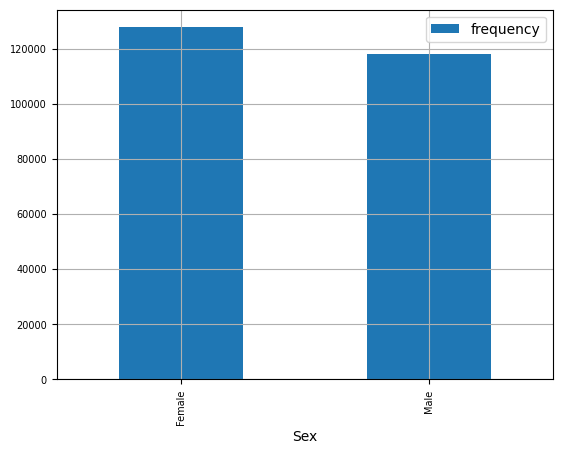

In [11]:
sex_stats = get_stats(df.Sex, "Sex", cdf=False, reset_index=True)
sex_stats.plot.bar(x="Sex", y="frequency", rot=90.0, fontsize=7, grid=True)

### AgeCategory

<Axes: xlabel='AgeCategory'>

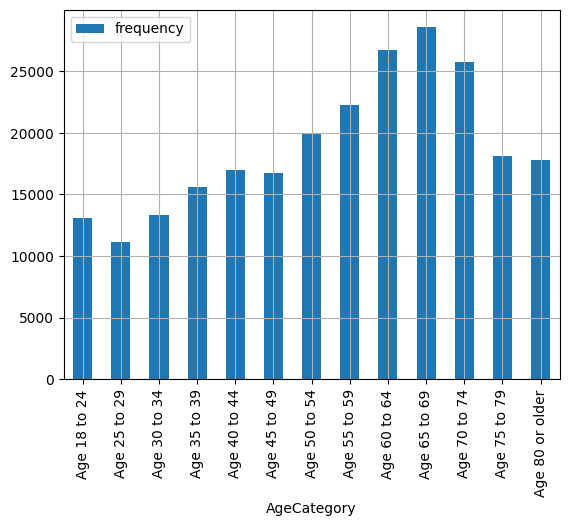

In [12]:
age_stats = get_stats(df.AgeCategory, "AgeCategory", cdf=False, reset_index=True)
age_stats.plot.bar(x="AgeCategory", y="frequency", grid=True)

AgeCategory variable shows normal distribution shape with a bit of left skewness.

### SleepHours

<Axes: xlabel='SleepHours'>

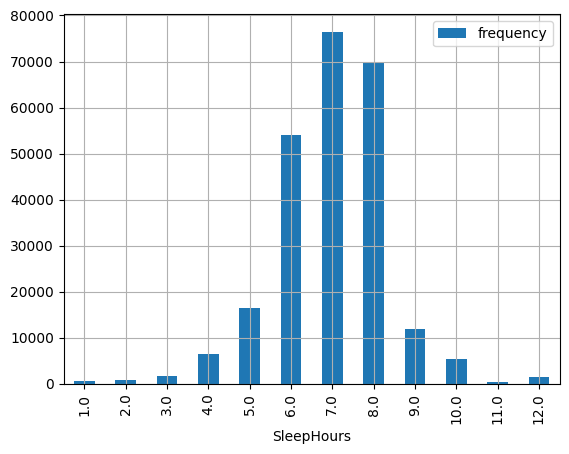

In [13]:
sleep_stats = get_stats(df.SleepHours, "SleepHours", cdf=False, reset_index=True)
sleep_stats.plot.bar(x="SleepHours", y="frequency", grid=True)

SleepHours variable shows a typical normal distribution. Let's check the summary statistics like mean, median and std of the SleepHours variable.

In [18]:
print(f"mean: {df.SleepHours.mean()}")
print(f"median: {df.SleepHours.median()}")
print(f"std: {df.SleepHours.std()}")

mean: 6.995866505240244
median: 7.0
std: 1.3566579076188758


## Probability Mass Function (PMF)

PMF is the discrete random variable that describes the probability of a value for a particular variable within the sample dataset. It is the same as histogram but described in probability.

<Axes: xlabel='AgeCategory'>

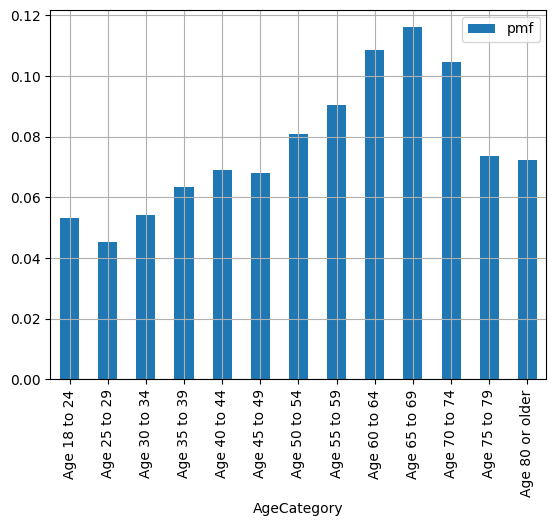

In [25]:
age_stats = get_stats(df.AgeCategory, "AgeCategory", cdf=False, reset_index=True)
age_stats.plot.bar(x="AgeCategory", y="pmf", grid=True)

<Axes: xlabel='SleepHours'>

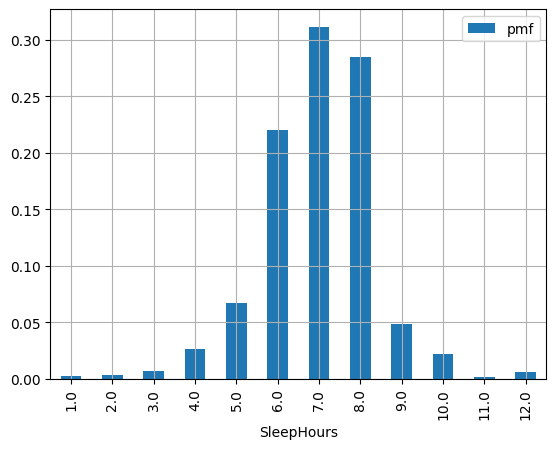

In [79]:
sleep_stats = get_stats(df.SleepHours, "SleepHours", cdf=False, reset_index=True)
sleep_stats.plot.bar(x="SleepHours", y="pmf", grid=True)

## Cumulative Distribution Function (CDF)

CDF of a random variable X evaluated at x is the probability that X will take a value less than or equal to x. For example, if CDF of the SleepHours of 7.0 is 0.5, then half of the entities in SleepHours is less than 7.0, thus median of SleepHours is 7.0.

<Axes: xlabel='SleepHours'>

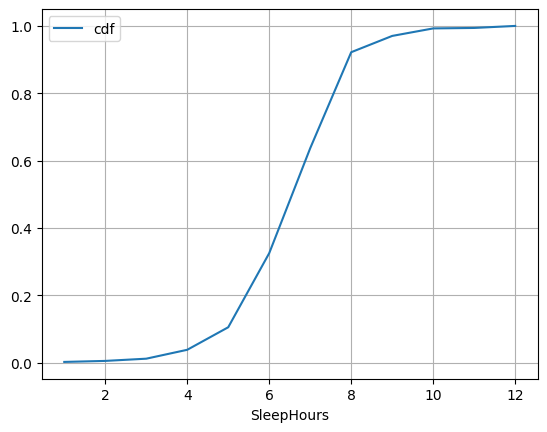

In [81]:
sleep_stats = get_stats(df.SleepHours, "SleepHours", cdf=True, reset_index=True)
sleep_stats.plot.line(x="SleepHours", y="cdf", grid=True)

The above CDF plot is a typical CDF plot pattern of a normal distribution. We can see a jump from 5 hours to 6 hours which also reflects the jump in number of 6 hours values we can see in histogram and PMF. Number of entities with SleepHours of 10, 11 and 12 is so small we can see there's no much big of a jump between 10 and 12 in CDF plot.

In [82]:
heartatt_df = df[df.HadHeartAttack=='Yes']
noheartatt_df = df[df.HadHeartAttack=='No']

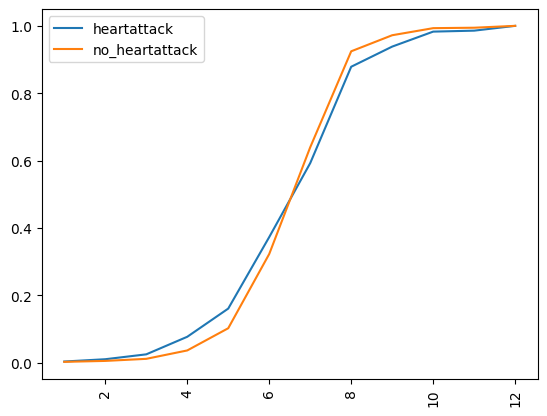

In [83]:
heartatt_sleep_stats = get_stats(heartatt_df.SleepHours, "SleepHours", cdf=True, reset_index=True)
noheartatt_sleep_stats = get_stats(noheartatt_df.SleepHours, "SleepHours", cdf=True, reset_index=True)

plt.plot(heartatt_sleep_stats.SleepHours, heartatt_sleep_stats.cdf, label="heartattack")
plt.plot(noheartatt_sleep_stats.SleepHours, noheartatt_sleep_stats.cdf, label="no_heartattack")
plt.xticks(rotation=90)
plt.legend()
plt.show()

In the above plot, we compared the sleep hours of people who have had heart attack and of those who haven't had a heart attack. Interestingly, we can see that number of people who sleeps less than 6 hours is bigger in heart attack scenerio and number of people who sleeps more than 7 hours is bigger in no heart attack scenerio.    
This might indicate that people who have good quality of sleep can prevent heart attack. But this is a bold and pretty biased statement since the ratio of heart attack to no heart attack cases is unbalanced (6%) in this sample.

## Probability Density Function (PDF) and Kernel Density Estimation (KDE)

PDF describes the PMF but in continuous fashion. PDF describes the relative likelihood of a value of the continuous random variable.   
PDF can be estimated by using KDE.

<Axes: ylabel='Density'>

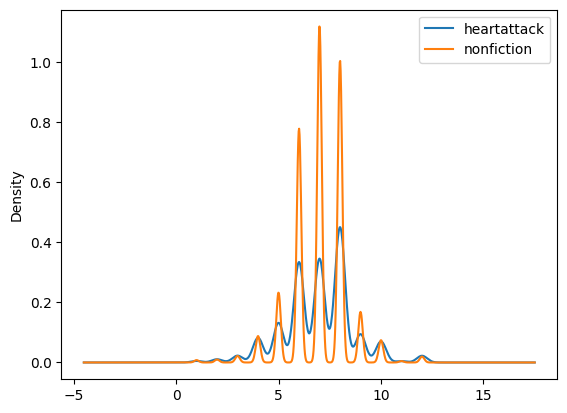

In [84]:
heartatt_df.SleepHours.plot(kind='kde', label='heartattack', legend=True)
noheartatt_df.SleepHours.plot(kind='kde', label='nonfiction', legend=True)

## Covariance and Correlation

Correlation and covariance describes the relationship between two variables.   
   
- Correlation: correlation defines the strength of the relationship between variables. For example, how likely variable A will increase if variable B increases.   
- Covariance: covariance defines the tendency of two variables to vary together.

### Covariance

In [21]:
def covariance(s1, s2):
    mean1 = s1.mean()
    mean2 = s2.mean()
    
    cov = np.dot(s1-mean1, s2-mean2) / len(s1)
    return cov

In [22]:
covariance(df.WeightInKilograms, df.BMI)

119.35681119969874

In [20]:
df.WeightInKilograms.cov(df.BMI)

119.35729634856341

Covariance between weights and BMI shows strong positive relationship.

### Correlation

<Axes: xlabel='BMI', ylabel='WeightInKilograms'>

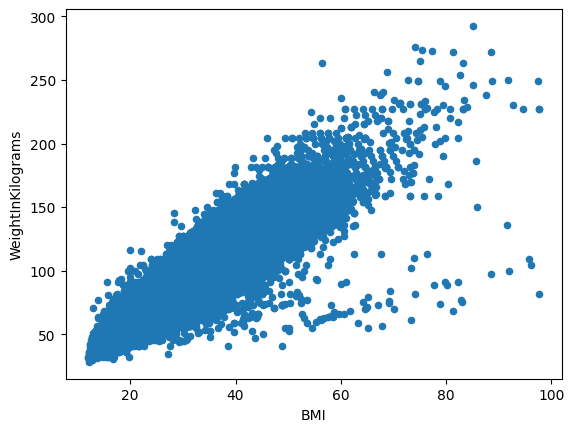

In [85]:
df.plot.scatter(x='BMI', y='WeightInKilograms')

In the above plot, we can see the strong positive correlation pattern between weights and BMI which makes sense.

### Pearson's Correlation

In [87]:
def pearson_corr(s1, s2):
  cov = s1.cov(s2)
  var1 = s1.var()
  var2 = s2.var()
  corr = cov / math.sqrt(var1 * var2)
  return corr

In [88]:
pearson_corr(df.WeightInKilograms, df.BMI)

0.8593132327366467

In [89]:
df.WeightInKilograms.corr(df.BMI, method='pearson')

0.8593132327366465

Pearson's correlation have value between -1 and 1 with -1 describing strong negative correlation and 1 describing strong positive correlation.   
Pearson's correlation value between weights and BMI is 0.86 which is a pretty strong positive correlation.

### Spearman's Rank Correlation

In [90]:
df.WeightInKilograms.corr(df.BMI, method='spearman')

0.8460889090703617

Spearman's correlation also show strong positive correlation.   
Spearman's correlation is more robust than pearson's correlation and it also considers non-linear relationships while pearson's correlation can only be accurate in linear relationship scenerios.